In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# колонки

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\Курсы аналитика\файл дз - Итог\HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### 1) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [5]:
stats_for_df = df.describe().loc[['mean', '50%', 'min', 'max', 'std'],:]

In [6]:
new_ind = list(stats_for_df.index) + ['mode']

In [7]:
mode_str = {}
for col in stats_for_df.columns:
    mode_str[col] = df[col].mode()[0]

In [8]:
# mode_str

In [9]:
stats_for_df = stats_for_df.append(mode_str, ignore_index=True).copy()

In [10]:
stats_for_df.index = new_ind

In [11]:
stats_for_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


#### 2.1 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
#### 2.2 Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [12]:
for col in df:
    print(f'значений в колонке {col} - {len(df[col].value_counts())}')

значений в колонке satisfaction_level - 92
значений в колонке last_evaluation - 65
значений в колонке number_project - 6
значений в колонке average_montly_hours - 215
значений в колонке time_spend_company - 8
значений в колонке Work_accident - 2
значений в колонке left - 2
значений в колонке promotion_last_5years - 2
значений в колонке department - 10
значений в колонке salary - 3


In [13]:
# убираем категориальные фичи (возмем как <= 10 значений)

df_for_corr = df.select_dtypes(exclude=['object']) \
                .drop(['Work_accident', 'left', 'promotion_last_5years', 
                       'number_project', 'time_spend_company'], axis=1).copy()

In [14]:
df_for_corr

,satisfaction_level,last_evaluation,average_montly_hours
0,0.38,0.53,157
1,0.80,0.86,262
2,0.11,0.88,272
3,0.72,0.87,223
4,0.37,0.52,159
...,...,...,...
14994,0.40,0.57,151
14995,0.37,0.48,160
14996,0.37,0.53,143
14997,0.11,0.96,280


In [15]:
corr = df_for_corr.corr(); corr

,satisfaction_level,last_evaluation,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.020048
last_evaluation,0.105021,1.000000,0.339742
average_montly_hours,-0.020048,0.339742,1.000000


In [16]:
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.020048
last_evaluation,0.105021,1.000000,0.339742
average_montly_hours,-0.020048,0.339742,1.000000


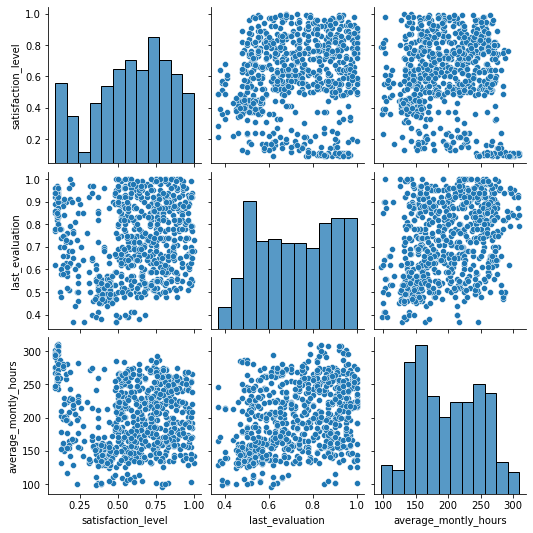

In [17]:
# Из за большого количества значений, возмем рандомные 5%

sns.pairplot(df_for_corr.sample(n=750, random_state=42))

In [18]:
# Никаких корреляций не найдено, наибольший коэффициент корреляции для количественных переменных = 0.339742 
# между временем в годах с последней оценки и средним количеством часов на рабочем месте в месяц

#### 3. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [19]:
# т.к. одна запись это 1 человек

df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### 4. Показать распределение сотрудников по зарплатам.

<AxesSubplot:xlabel='salary', ylabel='count'>

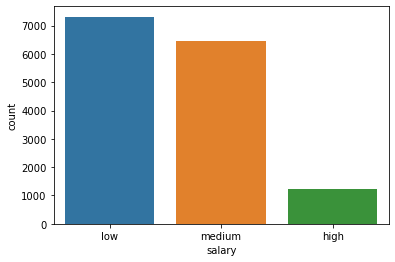

In [20]:
sns.countplot(x="salary", data=df)

#### 5. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:xlabel='salary', ylabel='count'>

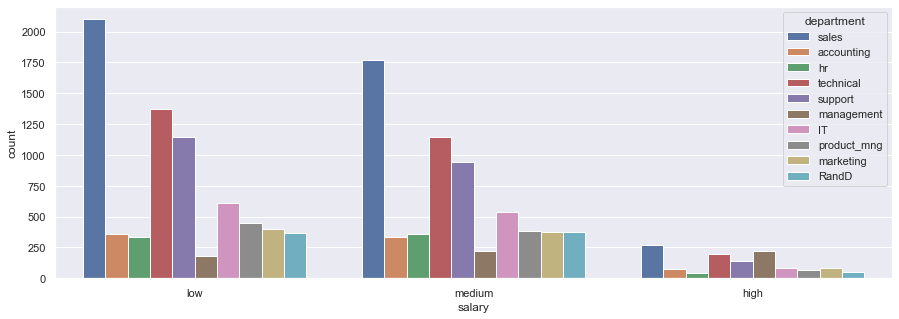

In [21]:
sns.set(rc={"figure.figsize":(15, 5)})

sns.countplot(x="salary", data=df, hue='department')

#### 6. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [22]:
df_low_salary_time = df.loc[df.salary == 'low', 'average_montly_hours']

In [23]:
df_high_salary_time = df.loc[df.salary == 'high', 'average_montly_hours']

<AxesSubplot:>

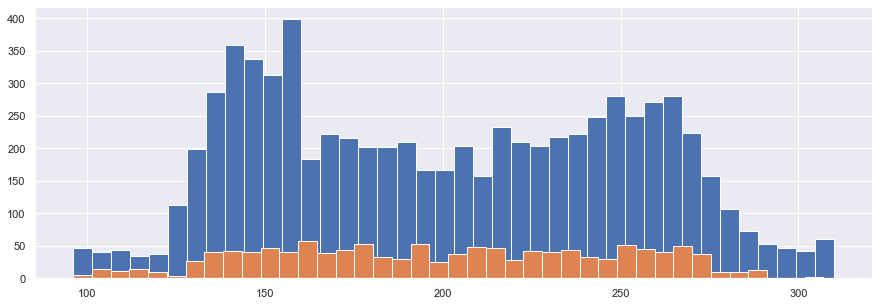

In [24]:
df_low_salary_time.hist(bins = 40)
df_high_salary_time.hist(bins = 40)

In [25]:
# Используем T-test Стьюдента

print(f't_statistic = {ttest_ind(df_low_salary_time, df_high_salary_time)[0]}')
print(f'p_value = {ttest_ind(df_low_salary_time, df_high_salary_time)[1]}')

t_statistic = 0.7288680398062308
p_value = 0.4661023478267259


In [26]:
# т.к. p_value > 0.05 ====> мы принимаем нулевую гипотезу о равенстве средних для выборок. 
# А значит богатые проводят НЕ больше времени на работе, чем бедные

#### 7. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
#### - Доля сотрудников с повышением за последние 5 лет
#### - Средняя степень удовлетворенности
#### - Среднее количество проектов

In [27]:
left_prom = round(df.loc[(df.left == 1) & (df.promotion_last_5years == 1)].shape[0] / (df.left == 1).sum(), 3)
dont_left_prom = round(df.loc[(df.left == 0) & (df.promotion_last_5years == 1)].shape[0] / (df.left == 0).sum(), 3)

In [28]:
X = df.groupby(by=['left'], as_index=False).agg({'satisfaction_level': 'mean', 
                                                 'number_project': 'mean'})

In [29]:
print(f'{left_prom} % - уволившиеся, которых повышали')
print(f'{dont_left_prom} % - действующие, которых повышали')
print(f'{round(X.loc[X.left == 1, "satisfaction_level"].values[0], 3)} % - уволившиеся, ср. удовлетворенность')
print(f'{round(X.loc[X.left == 0, "satisfaction_level"].values[0], 3)} % - действующие, ср. удовлетворенность')
print(f'{round(X.loc[X.left == 1, "number_project"].values[0], 3)} % - уволившиеся, ср. кол-во проектов')
print(f'{round(X.loc[X.left == 0, "number_project"].values[0], 3)} % - действующие, ср. кол-во проектов')

0.005 % - уволившиеся, которых повышали
0.026 % - действующие, которых повышали
0.44 % - уволившиеся, ср. удовлетворенность
0.667 % - действующие, ср. удовлетворенность
3.856 % - уволившиеся, ср. кол-во проектов
3.787 % - действующие, ср. кол-во проектов


#### 8. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли
####     сотрудник на основе имеющихся факторов (кроме department и salary)
####     Оценить качество модели на тестовой выборки

In [30]:
features_for_lda = df.drop(['department', 'salary', 'left'], axis=1).copy()

In [31]:
target_for_lda = df.left

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features_for_lda, target_for_lda, test_size=0.15, random_state=42)

In [33]:
print(f'исходный размер - {df.shape}')
print(f'фичи размер - {features_for_lda.shape}')
print(f'таргет размер - {target_for_lda.shape}')
print(f'трейн фичи размер - {X_train.shape}')
print(f'тест фичи размер - {X_test.shape}')
print(f'трейн таргет размер - {y_train.shape}')
print(f'тест таргет размер - {y_test.shape}')

исходный размер - (14999, 10)
фичи размер - (14999, 7)
таргет размер - (14999,)
трейн фичи размер - (12749, 7)
тест фичи размер - (2250, 7)
трейн таргет размер - (12749,)
тест таргет размер - (2250,)


In [34]:
lda = LinearDiscriminantAnalysis()

In [35]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
y_pred = lda.predict(X_test)

In [37]:
# уровень точности на тестовой выборке примерно 75%

print(f'уровень качества модели по accuracy_score = {round(accuracy_score(y_test, y_pred), 3) * 100} %')

уровень качества модели по accuracy_score = 74.8 %


In [38]:
# Загрузить jupyter notebook с решением на github и прислать ссылку